In [4]:
#Importing Packages

import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the Churn Data

In [5]:
df=pd.read_csv('C:/Users/Pankaj/Desktop/Churn-Modelling/DataFiles/churn.csv')

# Listing all columns

In [6]:
# Listing all columns
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [7]:
df.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       16.62       254.4          103         11.45       13.7           3   
2       10.30       162.6          104          7.32       12.2           5   
3        5.26       196.9           89          8.86        6.6           7   
4       12.61       186.9          121          8.41       10.1           3   

   Intl Charge  CustServ Calls  Churn?  
0         2.70               1  False.  
1         3.70               1  False.  
2         3.29               0  False.  
3         1.78               2  False.  
4         2.73               3  False.  

[5 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [9]:
#There are 2 type of data types in columns: one is Categorical and other is Numeric.
#Making a separate list for both the data types:

numeric_columns = ["Account Length", "VMail Message", "Day Mins",
                "Day Calls", "Day Charge", "Eve Mins",
                "Eve Calls", "Eve Charge", "Night Mins",
                "Night Calls", "Intl Mins", "Intl Calls",
                "Intl Charge"]

categorical_columns = ["State", "Int'l Plan", "VMail Plan", "Area Code"]


In [10]:
df[numeric_columns]

Account Length  VMail Message  Day Mins  Day Calls  Day Charge  \
0                128             25     265.1        110       45.07   
1                107             26     161.6        123       27.47   
2                137              0     243.4        114       41.38   
3                 84              0     299.4         71       50.90   
4                 75              0     166.7        113       28.34   
5                118              0     223.4         98       37.98   
6                121             24     218.2         88       37.09   
7                147              0     157.0         79       26.69   
8                117              0     184.5         97       31.37   
9                141             37     258.6         84       43.96   
10                65              0     129.1        137       21.95   
11                74              0     187.7        127       31.91   
12               168              0     128.8         96       21.90   
13                95              0     156.6         88       26.62   
14                62              0     120.7         70       20.52   
15               161              0     332.9         67       56.59   
16                85             27     196.4        139       33.39   
17                93              0     190.7        114       32.42   
18                76             33     189.7         66       32.25   
19                73              0     224.4         90       38.15   
20               147              0     155.1        117       26.37   
21                77              0      62.4         89       10.61   
22               130              0     183.0        112       31.11   
23               111              0     110.4        103       18.77   
24               132              0      81.1         86       13.79   
25               174              0     124.3         76       21.13   
26                57             39     213.0        115       36.21   
27                54              0     134.3         73       22.83   
28                20              0     190.0        109       32.30   
29                49              0     119.3        117       20.28   
...              ...            ...       ...        ...         ...   
3303             114             26     137.1         88       23.31   
3304              71              0     186.1        114       31.64   
3305              58             22     224.1        127       38.10   
3306             106             29      83.6        131       14.21   
3307             172              0     203.9        109       34.66   
3308              45              0     211.3         87       35.92   
3309             100              0     219.4        112       37.30   
3310              94              0     190.4         91       32.37   
3311             128              0     147.7         94       25.11   
3312             181              0     229.9        130       39.08   
3313             127              0     102.8        128       17.48   
3314              89              0     178.7         81       30.38   
3315             149             18     148.5        106       25.25   
3316             103             29     164.1        111       27.90   
3317             163              0     197.2         90       33.52   
3318              52              0     124.9        131       21.23   
3319              89              0     115.4         99       19.62   
3320             122              0     140.0        101       23.80   
3321              60              0     193.9        118       32.96   
3322              62              0     321.1        105       54.59   
3323             117              0     118.4        126       20.13   
3324             159              0     169.8        114       28.87   
3325              78              0     193.4         99       32.88   
3326              96              0     106.6 

# Data Exploration and Data Cleaning

Now we can perform some basic exploratory analysis to get a better understanding of what is in our data.

How much data we have
If there are any missing values
What data type each column is
The distribution of data in each column
We could also take this opportunity to plot some charts to help us get an idea of what variables / features will prove useful. For example, if we where thinking of doing some regression analysis, scatter charts could give us a visual indication of correlation between features.

In [16]:
print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)

Number of rows:  3333


Account Length  Area Code  VMail Message  Day Mins  \
Count of values          3333.0     3333.0         3333.0    3333.0   

                 Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
Count of values     3333.0      3333.0    3333.0     3333.0      3333.0   

                 Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
Count of values      3333.0       3333.0        3333.0     3333.0      3333.0   

                 Intl Charge  CustServ Calls  
Count of values       3333.0          3333.0

Text(0,0.5,'Number Of Customers')

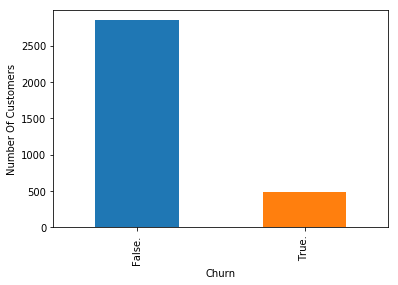

In [17]:
#Counting the Churn and plotting it:

churn_count=pd.value_counts(df['Churn?'])
churn_count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Number Of Customers')
#plt.show()

# There is a clear imbalance between churned and unchurned customers.
# Number of churned customers=500
# Number of not churned customers=2800

C:\Users\Pankaj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


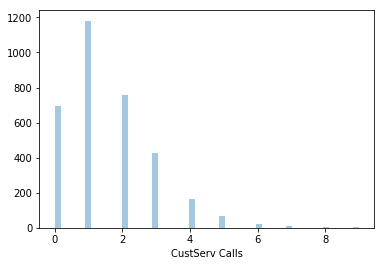

In [21]:
# #Plotting a curve to see the number of customer care call distribution.

sns.distplot(df['CustServ Calls'],kde=False)

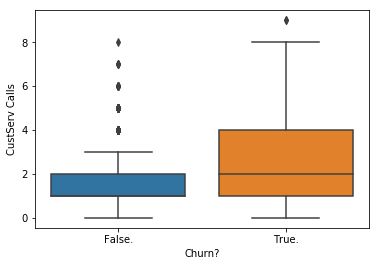

In [22]:
sns.boxplot(x='Churn?',y='CustServ Calls',data=df)

In [23]:
# From the above boxplot, below 2 conclusions can be made: 
#The boxplot shows that the median number of customer service call where customer churn is 2.
#There are some outliers also where customers have made more than 4 calls but has not churned.

# Plotting Pairplot to see Interaction between features

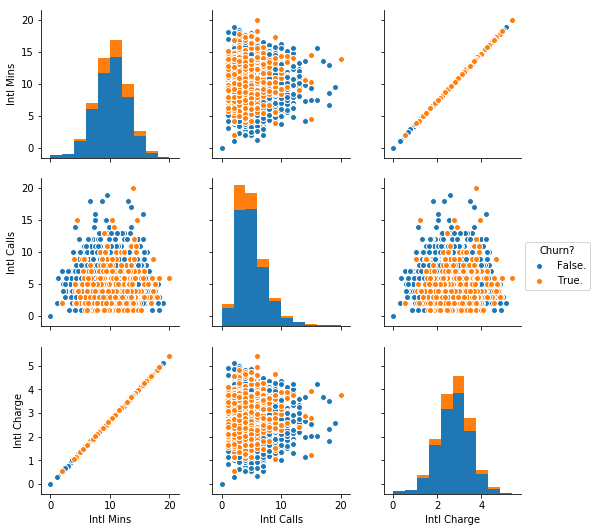

In [25]:
sns.pairplot(df[["Intl Mins", "Intl Calls","Intl Charge", "Churn?"]],hue='Churn?')

In [26]:
# After observing the graphs, we can conclude that there is linear relationship between some features.

# Plotting the Heatmap to explore the co-relation between the features

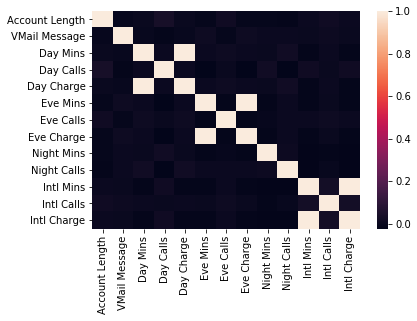

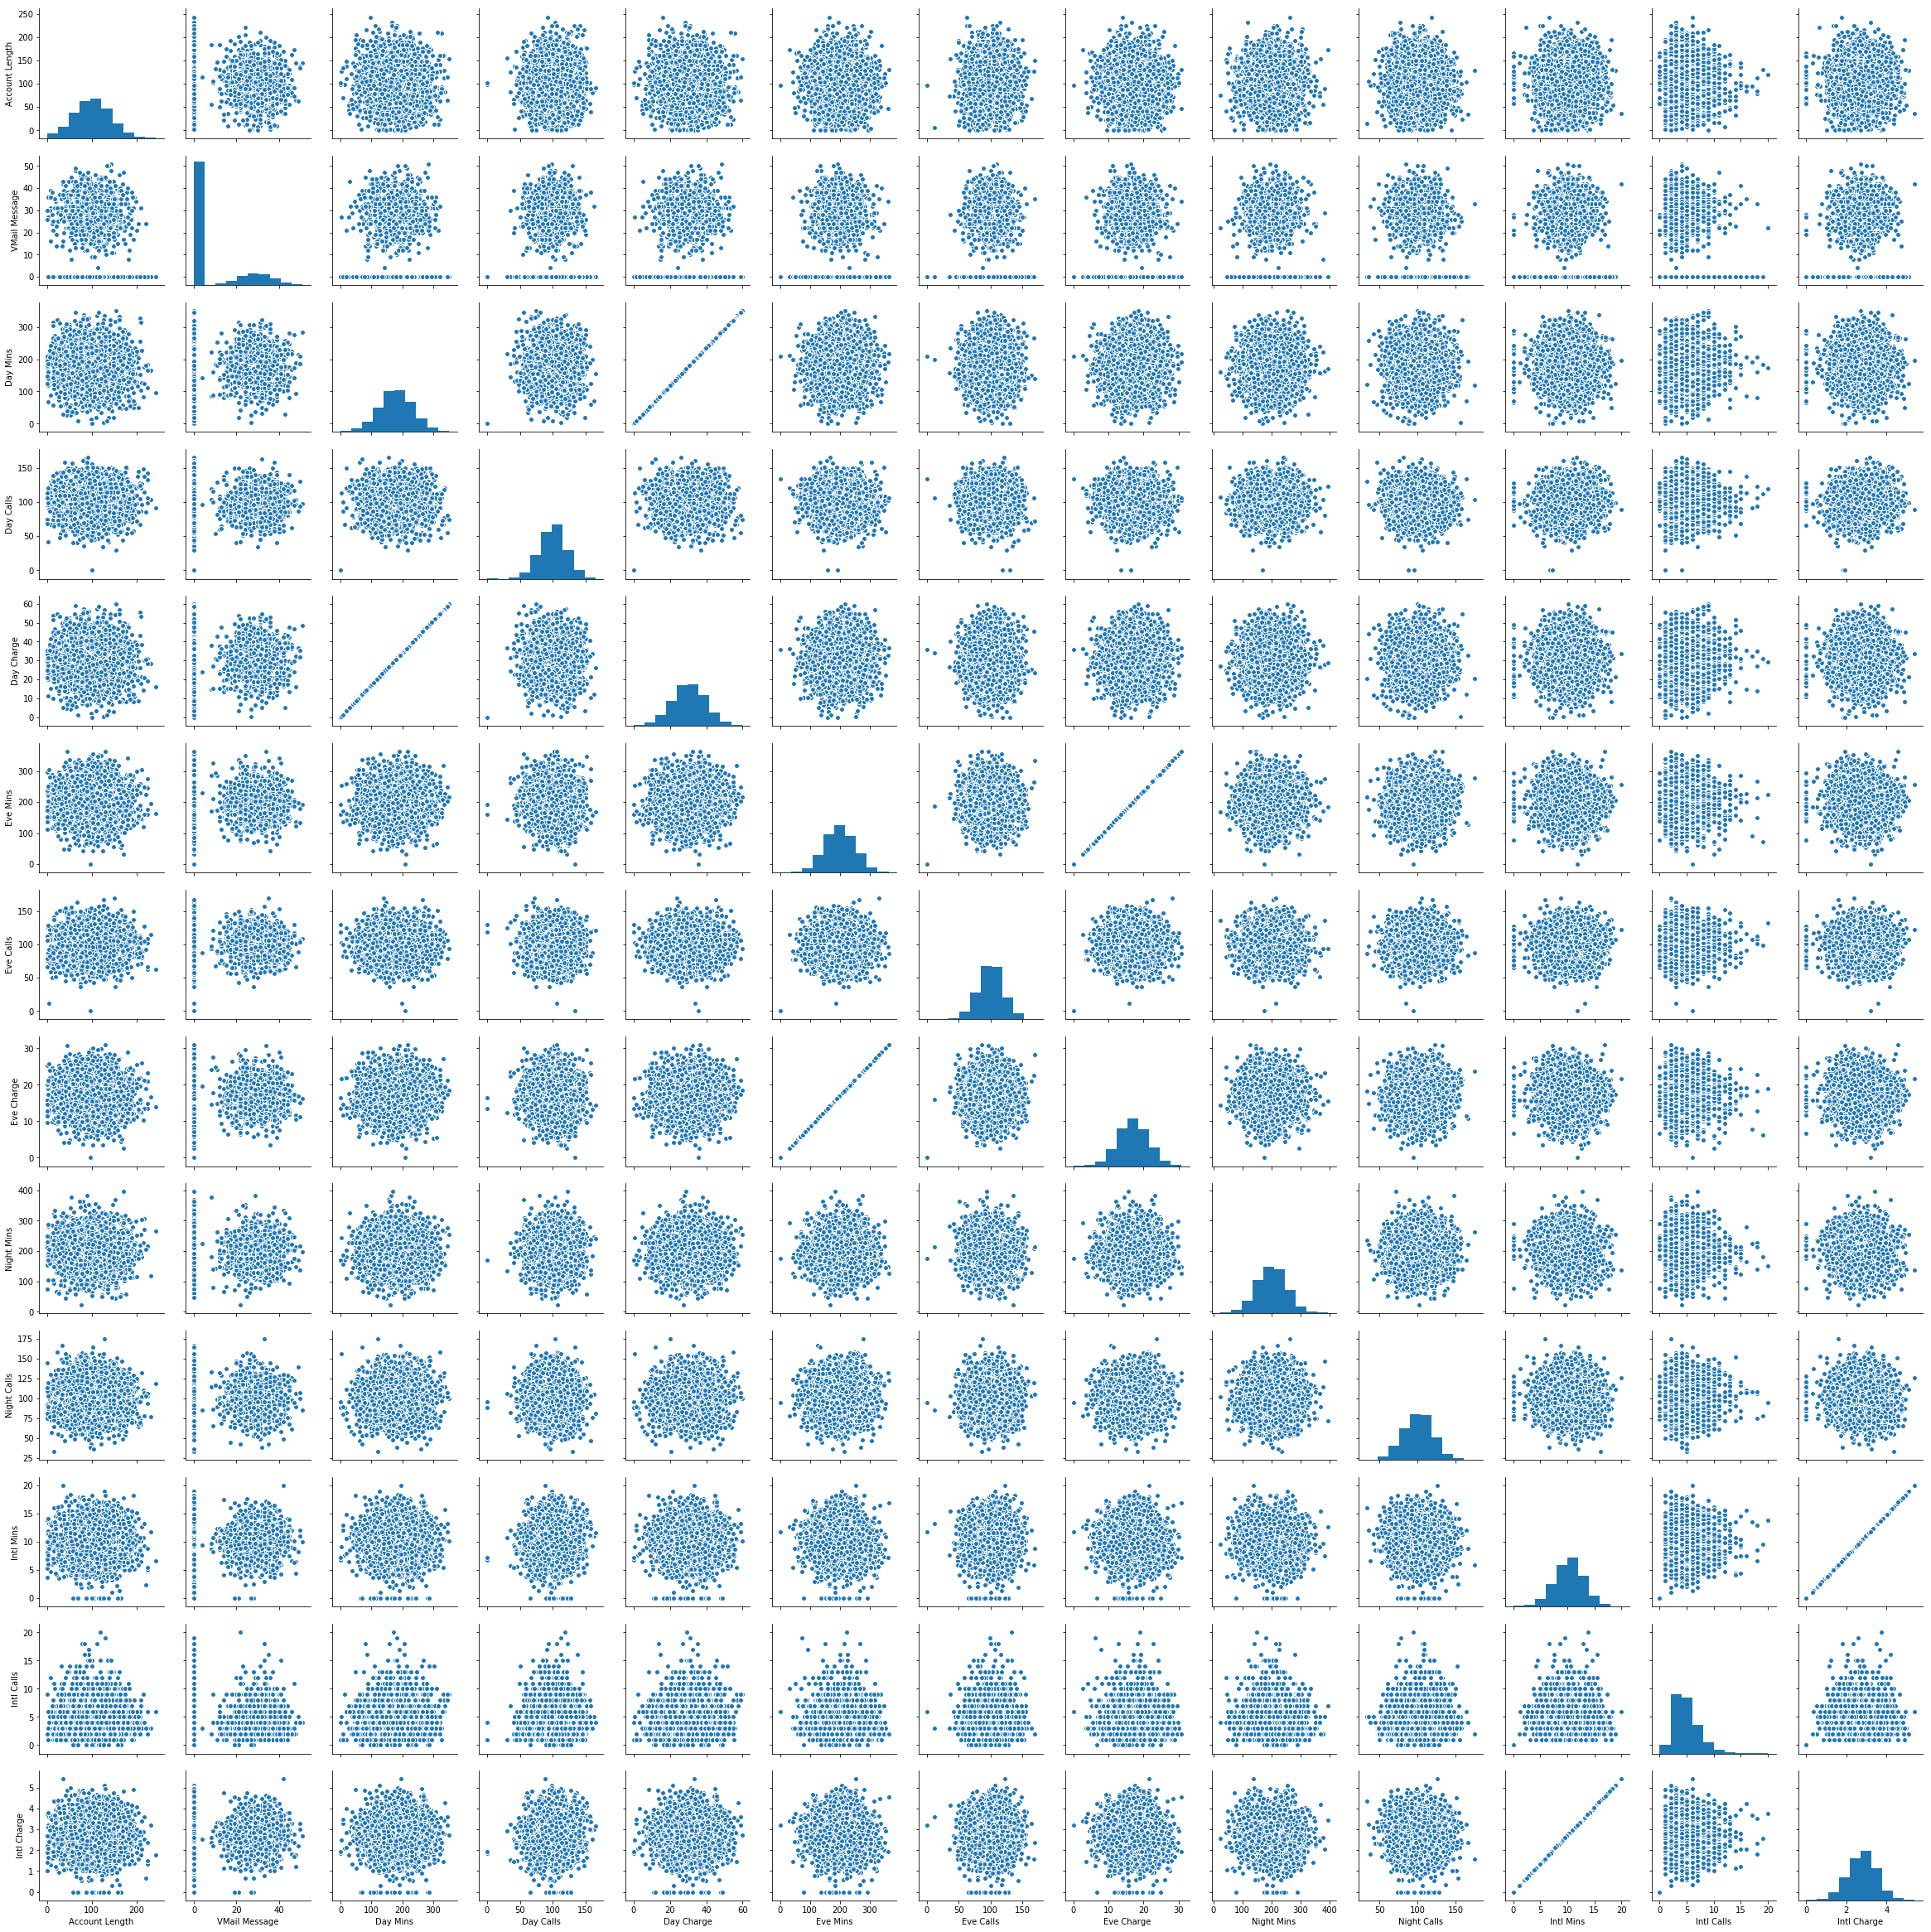

In [37]:
correlation=df[numeric_columns].corr()
sns.heatmap(correlation)
sns.pairplot(df[numeric_columns],palette='Paired')

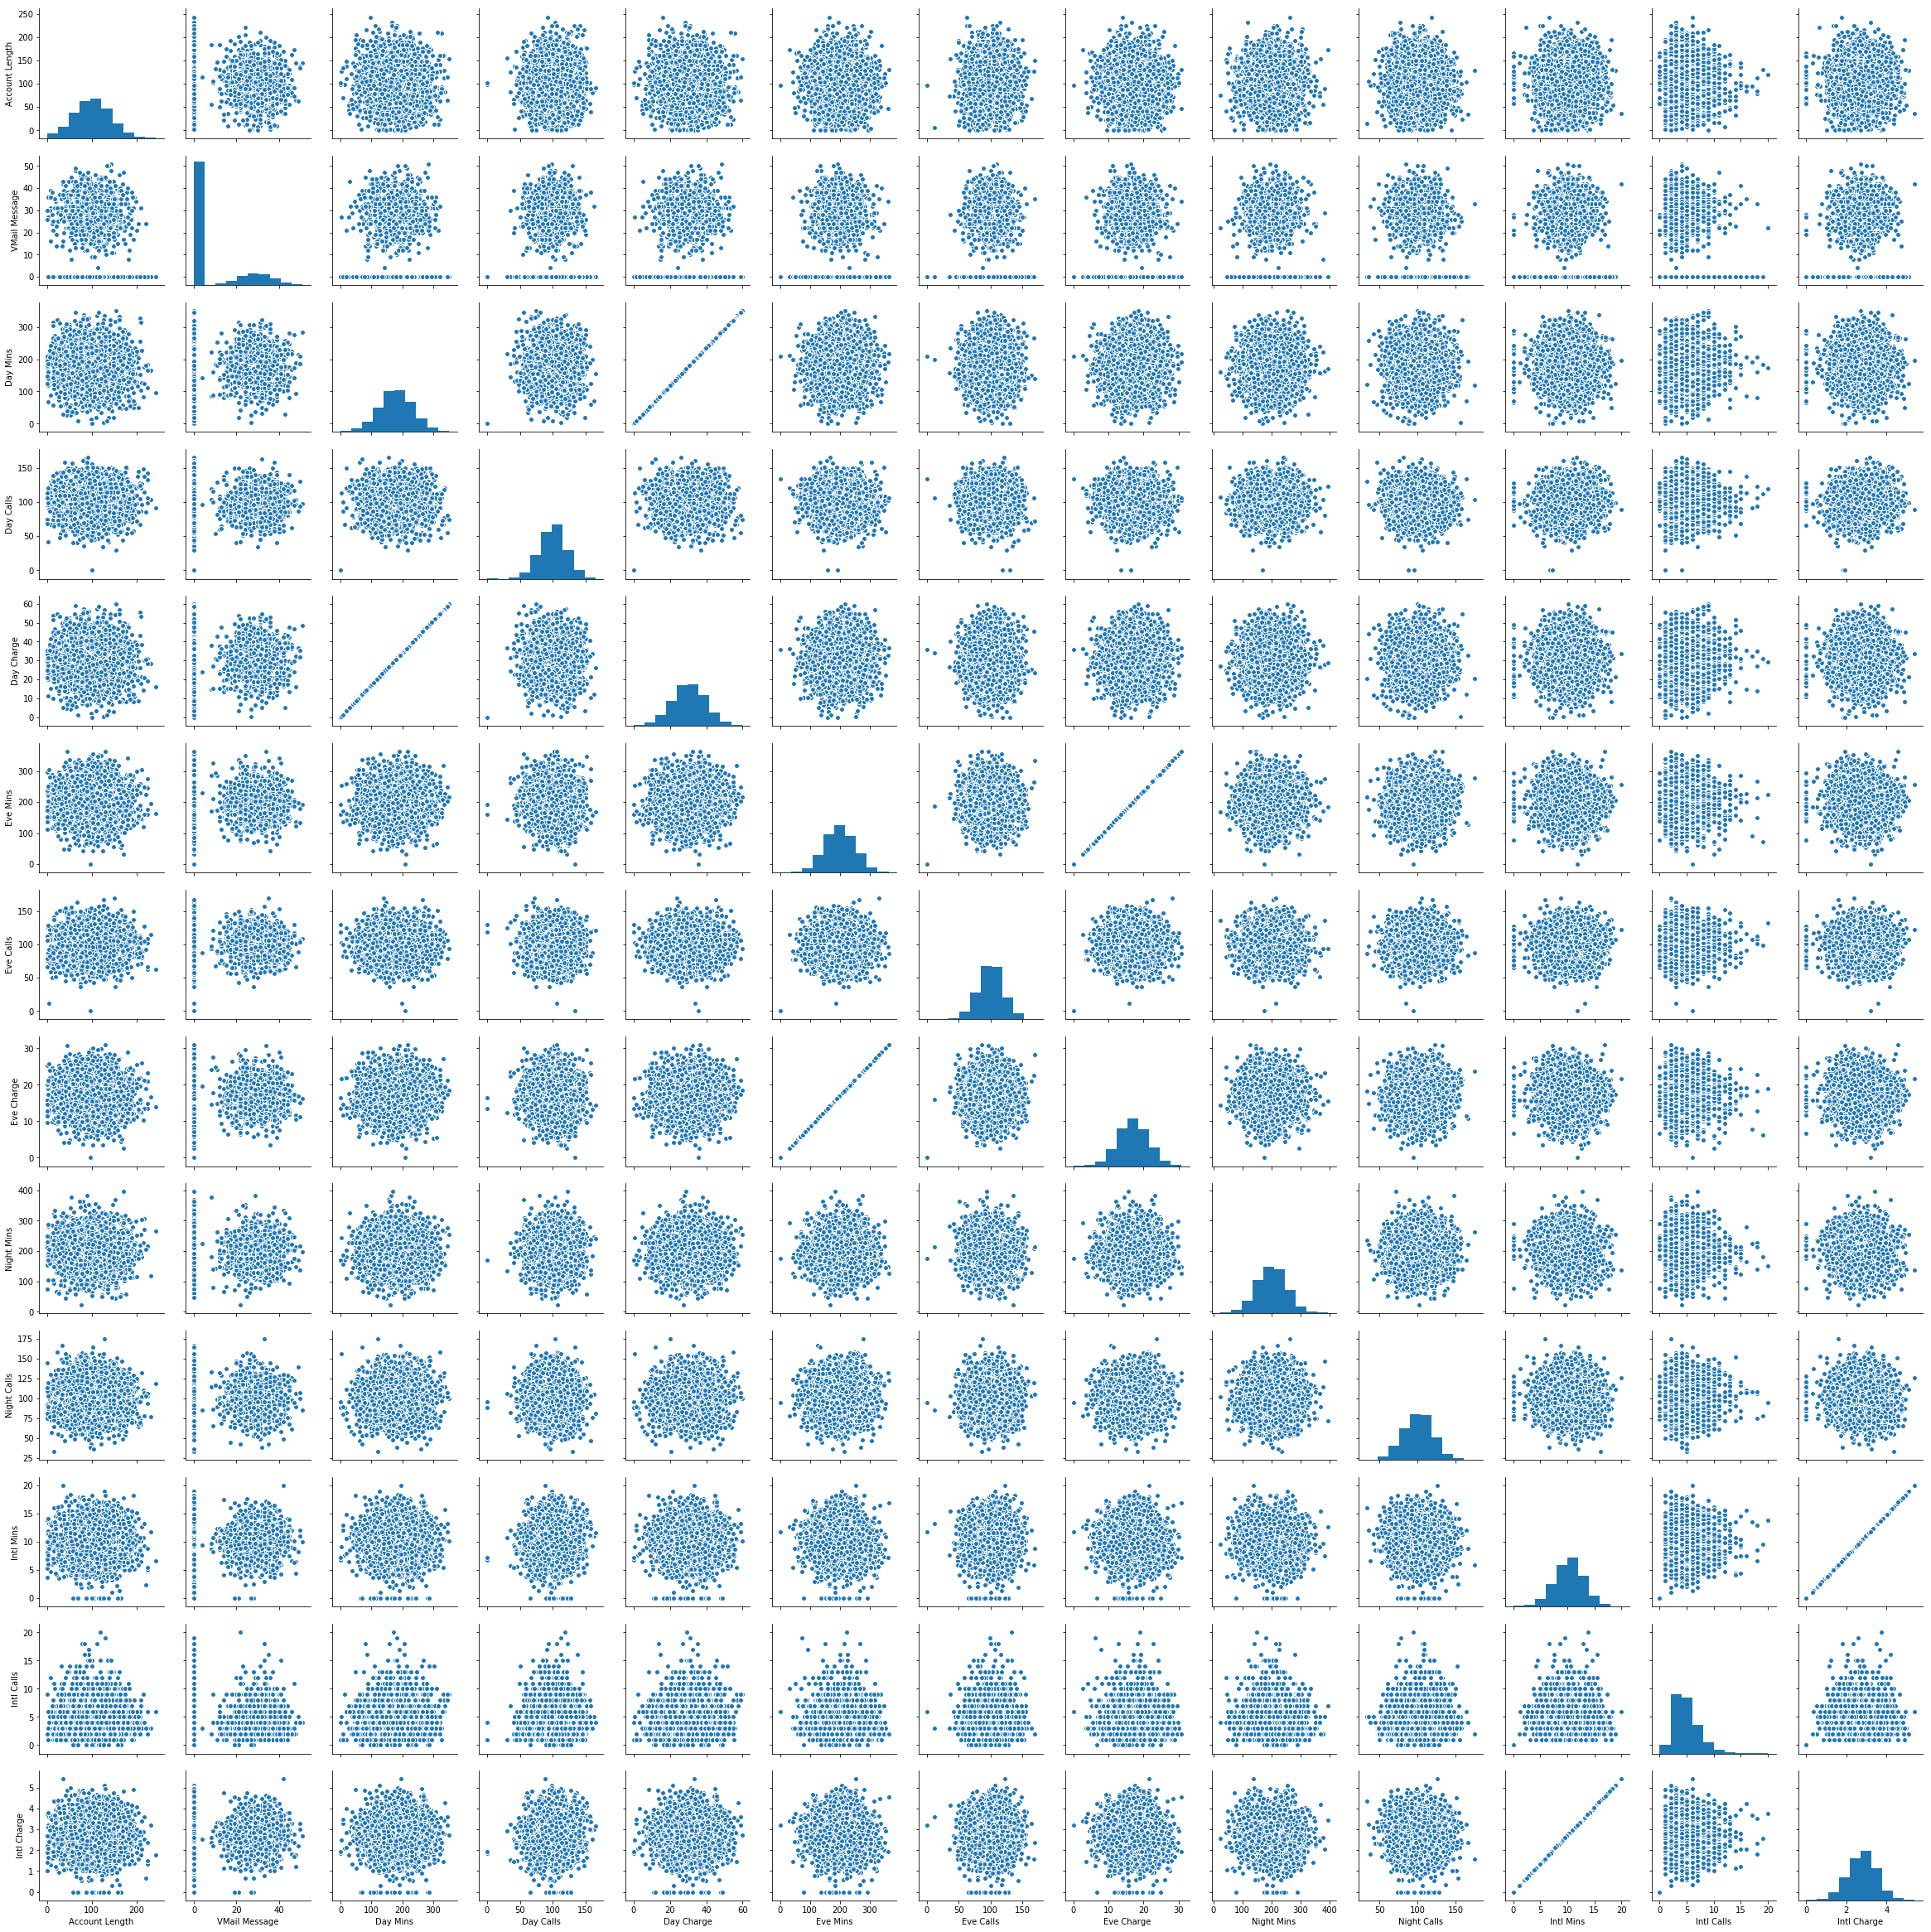

In [38]:
# Labelled data
churn=df['Churn?']
y=np.where(churn=='True.',1,0)

In [39]:
# Dropping features which are not significant
column_to_drop=['State','Area Code','Phone','Churn?']
churn_df=df.drop(column_to_drop,axis=1)

In [40]:
#Converting the categorical values into numbers
categ_column=["Int'l Plan","VMail Plan"]
churn_df[categ_column]=churn_df[categ_column]=='yes'
features=churn_df.columns
features

Index(['Account Length', 'Int'l Plan', 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls'],
      dtype='object')

# Preparing Feature Matrix

In [41]:
X=churn_df.as_matrix().astype(np.float)

C:\Users\Pankaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


# Data Normalization

In [60]:
X = StandardScaler().fit_transform(X)

# To determine the most suitable scoring metric/s for our situation, undertake more robust checks of our chosen metrics, and attempt to reduce / avoid issues such as over-fitting, we are using methods such as k-fold cross validation.
#K-Fold cross validation.

def cross_validation(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

# Running 5 different models Logistic Regression,SVM,Random Forest, K nearest neighbour and Gradient Boosting

In [47]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC

def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

print ("Logistic Regression:")
print ("%.3f" % accuracy(y, cross_validation(X,y,LR)))
print ("Gradient Boosting Classifier")
print ("%.3f" % accuracy(y, cross_validation(X,y,GBC)))
print ("Support vector machines:")
print ("%.3f" % accuracy(y, cross_validation(X,y,SVC)))
print ("Random forest:")
print ("%.3f" % accuracy(y, cross_validation(X,y,RF)))
print ("K-nearest-neighbors:")
print ("%.3f" % accuracy(y, cross_validation(X,y,KNN)))

Logistic Regression:
0.860
Gradient Boosting Classifier
0.950
Support vector machines:
0.919
Random forest:
0.944
K-nearest-neighbors:
0.893


# After looking at the above scores, the top 2 best scores are given by Gradient Boosting Classifier and Random Forest

# Checking the Confusion Matrix as it is a better way for evaluation of model as class was imbalanced.

[[2820   30]
 [ 240  243]]


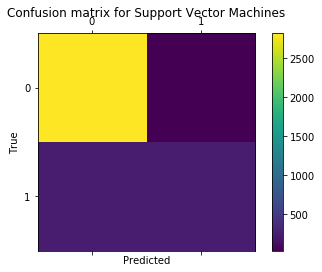

[[2813   37]
 [ 160  323]]


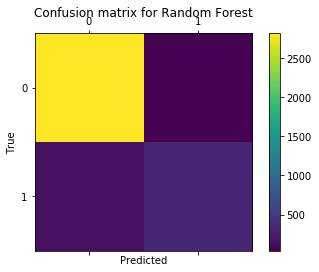

[[2801   49]
 [ 311  172]]


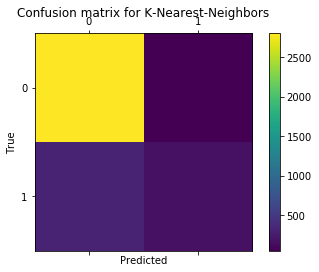

[[2813   37]
 [ 131  352]]


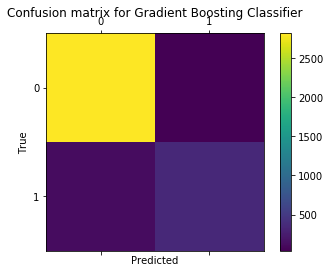

[[2767   83]
 [ 382  101]]


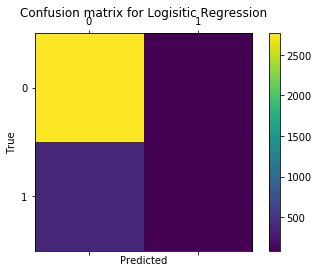

In [48]:
# We will construct a confusion matrix to dig further into the quality of our results. In a more rigorous exercise part of this stage would be to determine the most suitable scoring metric/s for our situation, undertake more robust checks of our chosen metrics, and attempt to reduce / avoid issues such as over-fitting by using methods such as k-fold cross validation.


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        print(cm)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ( "Support Vector Machines", confusion_matrix(y,cross_validation(X,y,SVC)) ),
    ( "Random Forest", confusion_matrix(y,cross_validation(X,y,RF)) ),
    ( "K-Nearest-Neighbors", confusion_matrix(y,cross_validation(X,y,KNN)) ),
    ( "Gradient Boosting Classifier", confusion_matrix(y,cross_validation(X,y,GBC)) ),
    ( "Logisitic Regression", confusion_matrix(y,cross_validation(X,y,LR)) )
]




draw_confusion_matrices(confusion_matrices,class_names)

# Looking at the Recall and the Precision rate, Gradient Boosting and Random Forest performed the best

Support vector machines:


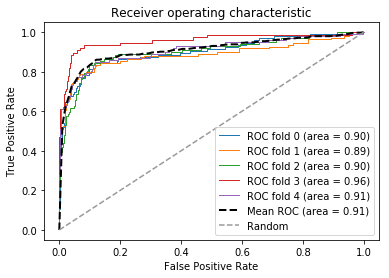

Random forests:


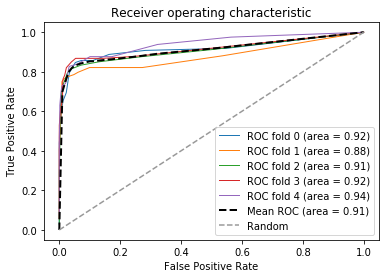

K-nearest-neighbors:


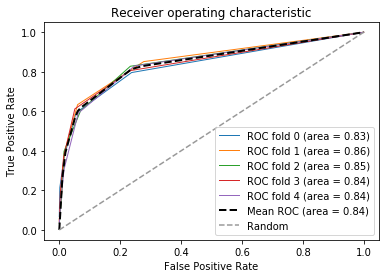

Gradient Boosting Classifier:


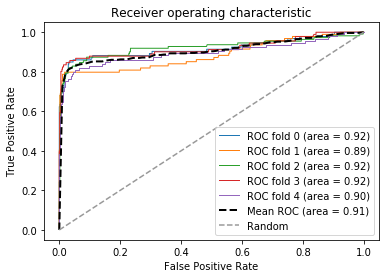

In [53]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

def plot_roc(X, y, clf_class, **kwargs):
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train_index, test_index) in enumerate(kf):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y[test_index], y_prob[test_index, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    mean_tpr /= len(kf)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
      

print ("Support vector machines:")
plot_roc(X,y,SVC,probability=True)

print ("Random forests:")
plot_roc(X,y,RF,n_estimators=18)

print ("K-nearest-neighbors:")
plot_roc(X,y,KNN)

print ("Gradient Boosting Classifier:")
plot_roc(X,y,GBC)

# By seeing the ROC curve we can say that Gradient Boosting and Random forest performed best.

# Checking the features which cause customer churn

Feature ranking:
1. Account Length (0.152881)
2. Int'l Plan (0.145239)
3. VMail Plan (0.082529)
4. VMail Message (0.081670)
5. Day Mins (0.059391)
6. Day Calls (0.036608)
7. Day Charge (0.033471)
8. Eve Mins (0.026680)
9. Eve Calls (0.026362)
10. Eve Charge (0.011718)


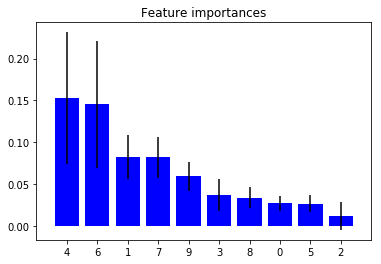

In [54]:
train_index,test_index = train_test_split(churn_df.index)

forest = RF()
forest_fit = forest.fit(X[train_index], y[train_index])
forest_predictions = forest_fit.predict(X[test_index])

importances = forest_fit.feature_importances_[:10]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
#import pylab as pl
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices], yerr=std[indices], color="b", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

# Conclusion: